In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
gdp_data = pd.read_csv('./data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv')
le_data = pd.read_csv('./data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
cm_data = pd.read_csv('./data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
tmp1 = pd.merge(gdp_data, cm_data, on=['geo', 'time'], how='left')
raw_data = pd.merge(tmp1, le_data, on=['geo', 'time'], how='left')

## Problem 1

See Piazza

## Problem 2

Link: https://github.com/philip-johnson-2/ds5500-hw1
The linked graphic used an actual map of the world rather than a line or bar chart to show the distribution of income across time. Their graph makes it more clear where exactly in the world high and low GDP levels can be found. However, it is challenging to differentiate between countries that are not at the top of the spectrum. Most of the countries outside of North America, Europe, and Australia look to be about the same color, despite some having more that 2-3x as much as other countries of similar color. The scale appears to be linear which could explain this difference. Because of this reason, the graph is easy to interpret in terms of the wealthier countries, but makes it hard to see differences in individual countries, and across the entire spectrum. My graph took a more wholistic view rather than an individual country view, so it may be easier to see the changes on average but harder to see changes for each individual country.

## Problem 3

Link: https://github.com/philip-johnson-2/ds5500-hw1
The graphs used for the problems of mortality and life expectancy vs GDP/capita are broken out into multiple graphs for each variable. This is different than my graphs which map GDP and the response variables on the same graph. We both chose to group by region however. The graph makes it clear that there is a positive relationship with LE and a negative one with child mortality rate, and we get some idea of how they trend because of the shape of all the lines. However, because these variables aren't graphed together, we can't get a super detailed idea of the shape of the relationship, or any periods where that relationship may not have held to be true. For example, there is a drop in LE in africa around 2000 but we aren't able to clearly see if there is a corresponding drop in GDP because of the scale of that graph. It is possible that 2000 represents a break in a relationship but we can't see it clearly. Overall I think the graph gives us a clear idea that there are positive and negative relationships among these variables, but I think plotting a ratio or some combination of them together would allow us to see more clearly the shape of the trends.

## Problem 4

Model Coefficient:
[[5.12433]]
R-squared of model:
0.6139686034713563
MSE:
38.39364879623707


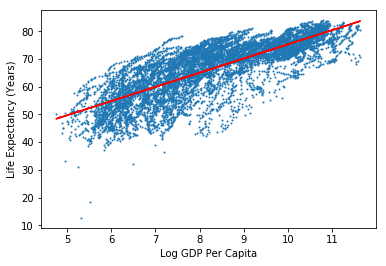

In [38]:
clean_data = raw_data[[
    'life_expectancy_years',
    'gdppercapita_us_inflation_adjusted'
]]
clean_data = clean_data.dropna()

y_vals = clean_data[[
    'life_expectancy_years'
]]
x_vals = np.log(clean_data[[
    'gdppercapita_us_inflation_adjusted'
]].values)

model = LinearRegression().fit(x_vals, y_vals)
print("Model Coefficient:\n" + str(model.coef_))
preds = model.predict(x_vals)
print("R-squared of model:\n" + str(r2_score(y_vals, 
                                             preds)))
print("MSE:\n" + str(mean_squared_error(y_vals, 
                                        preds)))


plt.scatter(x_vals, y_vals, s=1)
plt.plot(x_vals, preds, color='red')
plt.xlabel("Log GDP Per Capita")
plt.ylabel("Life Expectancy (Years)")
plt.show()

I chose to fit a linear regression model over a slightly modified version of the two variables. I fit the log of GDP per capita against an unmodified live expectancy. When performing a log operation on GDP, the data appears to be roughly in a linear group and seems as if linear regression would be an appropriate model after the transformation.

The linear model produced a coefficient on log-gdp/capita of 5.12 meaning that life expectancy is expected to increase by about 5 years for every ~2.7x increase in GDP per capita. The R-squared value of the model is .614 which is good but not great. It is relatively good for a real world dataset fitting against only one independant variable. The MSE of the model was ~38 meaning that the typical point lays about 6-years of LE off the best fit line. In a dataset where most of the points fall within a 40 year range, this is not bad. 

The data being autocorrelated time-wise likely makes this model less performant. There are likely countries that fall either well above or well below the best fit line consistently because the data is autocorrelated. This means that when the model makes a good or bad prediction on a country-year, it is likely to have a similar quality prediction on other data points for the outlier country.

Model Coefficient:
[[-0.67468161]]
R-squared of model:
0.6930675288320456
MSE:
0.45955122035006535


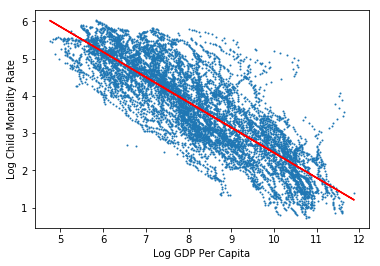

In [45]:
clean_data = raw_data[[
    'gdppercapita_us_inflation_adjusted',
    'child_mortality_0_5_year_olds_dying_per_1000_born'
]]
clean_data = clean_data.dropna()

y_vals = np.log(clean_data[[
    'child_mortality_0_5_year_olds_dying_per_1000_born'
]])
x_vals = np.log(clean_data[[
    'gdppercapita_us_inflation_adjusted'
]].values)

model = LinearRegression().fit(x_vals, y_vals)
print("Model Coefficient:\n" + str(model.coef_))
preds = model.predict(x_vals)
print("R-squared of model:\n" + str(r2_score(y_vals, 
                                             preds)))
print("MSE:\n" + str(mean_squared_error(y_vals, 
                                        preds)))


plt.scatter(x_vals, y_vals, s=1)
plt.plot(x_vals, preds, color='red')
plt.xlabel("Log GDP Per Capita")
plt.ylabel("Log Child Mortality Rate")
plt.show()

I chose to fit a linear regression model over a slightly modified version of the two variables. I fit the log of GDP per capita against an log child mortality rate. When performing a log operation on both variables, the data appears to be roughly in a linear group and seems as if linear regression would be an appropriate model after the transformation.

The linear model produced a coefficient on log-gdp/log-child-mortality of -.67 meaning that child mortality is expected to decline by ~2.7x years for every ~2.7x increase in GDP per capita. The R-squared value of the model is .693 which is good for a model with one linear variable. The MSE of the model was ~.46 meaning that the typical point lays about 1.25 children per 1000 off the best fit line for child mortality rate. This is quite good.

The data being autocorrelated time-wise likely makes this model less performant. There are likely countries that fall either well above or well below the best fit line consistently because the data is autocorrelated. This means that when the model makes a good or bad prediction on a country-year, it is likely to have a similar quality prediction on other data points for the outlier country.